In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import os, shutil

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path1 = '/content/drive/MyDrive/Colab_Notebooks/new_pic'
genpath = './drive/MyDrive/Colab_Notebooks/GenImg'

In [4]:
# 定義ImageDataGenerator
img_gen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True, rotation_range=10, 
                             width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1)

# 定義ReduceLROnPlateau
learning_rate_function = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [5]:
if os.path.exists(genpath):
    shutil.rmtree(genpath)
os.makedirs(genpath)

n = 1
for p in os.listdir(path1):
    path2 = path1 + f'/{p}'
    genpath2 = genpath + f'/{p}'
    if not os.path.exists(genpath2):
        os.makedirs(genpath2)
    #print(path2)
    #print(genpath2)
    #print(f'{p}')
    gen_data = img_gen.flow_from_directory(path1, batch_size=10, shuffle=False, save_to_dir=genpath2,
              classes = [f'{p}'], class_mode = 'binary', save_prefix=f'{p}', save_format='jpg', target_size=(256, 256))
    for i in range(40):
        gen_data.next()

Found 12 images belonging to 1 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Found 8 images belonging to 1 classes.
Found 11 images belonging to 1 classes.
Found 7 images belonging to 1 classes.
Found 9 images belonging to 1 classes.


In [6]:
x = []
y = []
n = 1
for p in os.listdir(path1):
    path2 = path1 + f'/{p}'
    genpath2 = genpath + f'/{p}'
    for i in os.listdir(path2):
        img = cv2.imread(f'{path2}/{i}')
        img = cv2.resize(img, (256, 256))
        # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Cv2讀進來是BGR，轉成RGB
        x.append(np.array(img))
        y.append(str(p))
    for i in os.listdir(genpath2):
        img = cv2.imread(f'{genpath2}/{i}')
        img = cv2.resize(img, (256, 256))
        # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Cv2讀進來是BGR，轉成RGB
        x.append(np.array(img))
        y.append(str(p))


In [7]:
x = np.asarray(x)
x.shape

(1467, 256, 256, 3)

In [8]:
import pandas as pd
df = pd.DataFrame(y)
df[0]
y = df[0].map({'iMeiMilk': 0, 'LimFengInMilk': 1, 'JuHsiangMilk': 2, 'FreshDelightMilk': 3, 'KuangChuanMilk': 4, 
               'LargeReiSuiMilk': 5, 'SmallReiSuiMilk': 6, 'LowFatLargeReiSuiMilk': 7, 'LowFatSmallReiSuiMilk': 8})
print(y)

0       2
1       2
2       2
3       2
4       2
       ..
1462    8
1463    8
1464    8
1465    8
1466    8
Name: 0, Length: 1467, dtype: int64


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1320, 256, 256, 3)
(1320,)
(147, 256, 256, 3)
(147,)


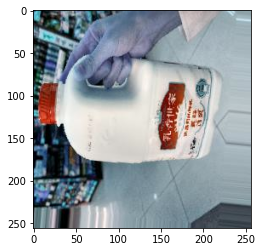

In [10]:
#x[:1]
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [ ]:
# 編譯模型
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
# 載入原有模型並訓練
from tensorflow.keras.models import Model, load_model
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab_Notebooks/model_0822.h5')
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, callbacks=[learning_rate_function])

Epoch 1/50
42/42 [==============================] - 69s 2s/step - loss: 10.2661 - accuracy: 0.1583 - val_loss: 4.8315 - val_accuracy: 0.2517 - lr: 1.0000e-05
Epoch 2/50
42/42 [==============================] - 67s 2s/step - loss: 3.7447 - accuracy: 0.2553 - val_loss: 3.0815 - val_accuracy: 0.2993 - lr: 1.0000e-05
Epoch 3/50
42/42 [==============================] - 65s 2s/step - loss: 2.5464 - accuracy: 0.3394 - val_loss: 2.3734 - val_accuracy: 0.3946 - lr: 1.0000e-05
Epoch 4/50
42/42 [==============================] - 67s 2s/step - loss: 1.8446 - accuracy: 0.4212 - val_loss: 1.6231 - val_accuracy: 0.5306 - lr: 1.0000e-05
Epoch 5/50
42/42 [==============================] - 66s 2s/step - loss: 1.0913 - accuracy: 0.6144 - val_loss: 0.8483 - val_accuracy: 0.7143 - lr: 1.0000e-05
Epoch 6/50
42/42 [==============================] - 65s 2s/step - loss: 0.5449 - accuracy: 0.7864 - val_loss: 0.5431 - val_accuracy: 0.8095 - lr: 1.0000e-05
Epoch 7/50
42/42 [==============================] - 67s 2

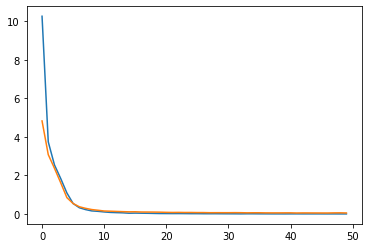

In [12]:
# 每迭代繪製損失
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.show()

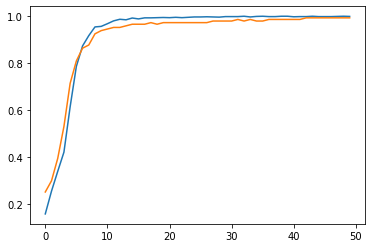

In [13]:
# 每迭代繪製精準度
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.show()

In [14]:
# 評估模型
print(model.evaluate(x_train, y_train))
print(model.evaluate(x_test, y_test))

42/42 [==============================] - 15s 358ms/step - loss: 3.2661e-04 - accuracy: 1.0000
[0.00032661345903761685, 1.0]
5/5 [==============================] - 2s 308ms/step - loss: 0.0528 - accuracy: 0.9932
[0.05278628692030907, 0.9931972622871399]


In [15]:
from sklearn.metrics import confusion_matrix
p_test = model.predict(x_test).argmax(axis=1)
cm_test = confusion_matrix(y_test, p_test)
print(cm_test)
p_train = model.predict(x_train).argmax(axis=1)
cm_train = confusion_matrix(y_train, p_train)
print(cm_train)

[[14  0  0  0  0]
 [ 0 24  1  0  0]
 [ 0  0 39  0  0]
 [ 0  0  0 30  0]
 [ 0  0  0  0 39]]
[[217   0   0   0   0]
 [  0 227   0   0   0]
 [  0   0 289   0   0]
 [  0   0   0 257   0]
 [  0   0   0   0 330]]


In [16]:
# 總結模型各層形狀與使用參數
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 127, 127, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 123008)            0         
                                                                 
 dropout (Dropout)           (None, 123008)            0         
                                                                 
 dense (Dense)               (None, 512)               629806

In [17]:
# 儲存訓練好的model
model.save('/content/drive/MyDrive/Colab_Notebooks/model_0830.h5')